## Stare here if...
You have some experience with R or Python and machine learning basics, but you’re new to computer vision. This competition is the perfect introduction to techniques like neural networks using a classic dataset including pre-extracted features.

## Competition Description

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

## Practice Skills

* Computer vision fundamentals including simple neural networks
* Classification methods such as SVM and K-nearest neighbors

# Data description

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```
The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:
```
ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
```
The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import numpy as np
import pandas as pd
#rcParams['font.family'] = "FZHei-B01, Input Mono"

In [3]:
train_data = pd.read_csv('./data/train.csv')

In [3]:
four = train_data[train_data["label"] == 4]
four.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,967.0,967.0,967.0,967.0,967.0,967.0,967.0,967.0,967.0,967.0,...,967.0,967.0,967.0,967.0,967.0,967.0,967.0,967.0,967.0,967.0
mean,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
# 保存为所有的图片，用于后续图像处理
import os
import matplotlib.image as mpimg
def gen_pics(train_data, outputdir="./data/pics", islabel=True):
    counts = {}
    if islabel:
        Y = train_data["label"]
        tmpX = train_data[train_data.columns.values[1:]]
        for i,digit in enumerate(Y):
            imgpixel = tmpX.loc[i].values.reshape(28,28)
            cnt = counts.get(digit,1)
            fdir = os.path.join(outputdir,str(digit))
            if not os.path.exists(fdir):
                os.makedirs(fdir)
            fname = os.path.join(fdir,"{:05d}.png".format(cnt))
            mpimg.imsave(fname, imgpixel)
            counts[digit] = cnt + 1 
        print(counts)
    else:
        if not os.path.exists(outputdir):
            os.makedirs(outputdir)
        for i in range(len(train_data)):
            imgpixel = train_data.loc[i].values.reshape(28,28)
            fname = os.path.join(outputdir, "{:05d}.png".format(i))
            mpimg.imsave(fname, imgpixel)
    
    return True

遍历所有的图片，并对图片做一定的处理，比如灰度化，去噪等，保存处理后的数据

In [148]:
import cv2
from glob import glob
from PIL import Image
import pickle
from imutils import paths

def load_pics(image_path="./data/pics", islabel=True):
    data = []
    labels = []
    for fname in paths.list_images(image_path):
        image = cv2.imread(fname)
        gray = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
        # Add some extra padding around the image
        gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
        # threshold the image (convert it to pure black and white)
        #thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        image = np.expand_dims(gray, axis=2)
        image = np.expand_dims(image, axis=0)
        if islabel:
            label = fname.split(os.path.sep)[-2]
        else:
            label = None
        data.append(image)
        labels.append(label)
    return (data, labels)

构建模型，这里使用 keras+tensorflow 构建神经网络模型

开始构建训练数据进行训练，保存当前的训练模型，以备以后使用

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import os
model_fpath="./data/model.hdf5"
model_label_fpath="./data/model_label.hdf5"
data, labels = load_pics()
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels,dtype="str")

In [230]:
(train_X, test_X, train_Y, test_Y) = train_test_split(data, labels, test_size=0.25, random_state=0)
k = train_X[:,:,:,0]
nsamples, nx, ny = k.shape
train_X = k.reshape(nsamples, nx*ny)
k = test_X[:,:,:,0]
nsamples, nx, ny = k.shape
test_X = k.reshape(nsamples, nx*ny)
del k

### SGD算法测试

In [232]:
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(loss="log", penalty="l2", max_iter=10000, tol=1e-5 )
clf_sgd.fit(train_X, train_Y)
score = clf.score(test_X, test_Y)
print(score)

0.6396190476190476


### KNN 算法测试

In [233]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=10, algorithm="kd_tree", n_jobs=-1)
clf_knn.fit(train_X, train_Y)
score = clf_knn.score(test_X, test_Y)
print(score)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='uniform')

In [234]:
score = clf_knn.score(test_X, test_Y)
print(score)

0.466


## Keras + TensorFlow

In [235]:
# 构建神经网络模型
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.layers import Activation

def build_simple_nn():
    model = Sequential()
    model.add(Dense(units=64, input_dim=784))
    model.add(Activation("relu"))
    model.add(Dense(units=10))
    model.add(Activation("softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

def build_nn():
    # Build the neural network!
    model = Sequential()

    # First convolutional layer with max pooling
    model.add(Conv2D(20, (5, 5), padding="same", input_shape=(28, 28), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Second convolutional layer with max pooling
    model.add(Conv2D(50, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Hidden layer with 500 nodes
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))

    # Output layer with 32 nodes (one for each possible letter/number we predict)
    model.add(Dense(10, activation="softmax"))

    # Ask Keras to build the TensorFlow model behind the scenes
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = build_simple_nn()
model.fit(train_X, train_Y, epochs=5, batch_size=32)
loss_and_metrics = model.evaluate(test_features, test_Y, batch_size=128)
print(loss_and_metrics)

ValueError: Error when checking target: expected activation_6 to have shape (None, 10) but got array with shape (31500, 1)

In [124]:
# 测试数据开始测试
import pandas as pd
test_data = pd.read_csv('./data/test.csv')

(28000, 784)


In [213]:
#gen_pics(test_data, outputdir='./data/test_pics', islabel=False)
test_data, _ = load_pics(image_path='./data/test_pics',islabel=False)

In [214]:
test_data = np.array(test_data, dtype="float") /255.0
k = test_data[:,:,:,0]
nsamples, nx, ny = k.shape
test_features = k.reshape(nsamples, nx*ny)

In [219]:
# k = test_data.as_matrix().reshape(28000, 28*28)
pred_Y = clf.predict(test_features)
#test_Y = [lb.inverse_transform(x) for x in test_Y]
print(len(pred_Y))
image_id = range(1,len(pred_Y)+1)
test = pd.DataFrame( { 'ImageId': image_id , 'Label': pred_Y } )
test.shape
test.head()
test.to_csv('digital_pred_with_sgd.csv' , index = False )

(28000, 784)
28000


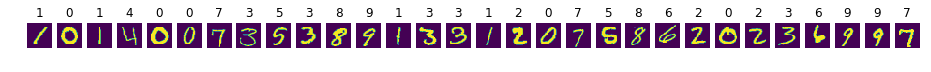

In [4]:

pics = 30
fig = plt.figure(figsize=(16,2))
axes = fig.subplots(1,pics)
#fig, axes = plt.subplots(nrows=1,ncols=pics,sharex=False,sharey=False)
#fig.set_figheight = 2
#fig.set_figwidth = 16

for i in range(pics):
    img = train_data[train_data.columns.values[1:]].loc[i]
    digital = train_data["label"][i]
    img = img.values.reshape(28,28)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(digital)
plt.show()

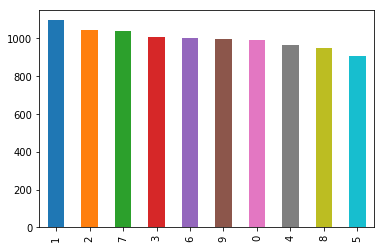

In [6]:
train_data.label.value_counts().plot(kind='bar')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
train_np = train_data.as_matrix()
Y = train_np[:,0]
X = train_np[:,1:] /255.0
Y

array([1, 0, 1, ..., 0, 4, 7])

In [8]:
from sklearn.preprocessing import LabelBinarizer
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state = 0)
lb = LabelBinarizer().fit(train_Y)
train_bin_Y = lb.transform(train_Y)
test_bin_Y = lb.transform(test_Y)

In [10]:
model = MLPClassifier(solver='sgd', alpha=0.00001, 
                            hidden_layer_sizes=(784, 1000, 10), random_state=1)
model.fit(train_X, train_bin_Y)

/usr/lib64/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(784, 1000, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [106]:
from sklearn.externals import joblib
joblib.dump(model,'small_model.hdf5', compress=3)

['small_model.hdf5']

In [ ]:
from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff
plot_learning_curve(model, u'学习曲线',train_X, train_Y)

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib64/python3.4/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/usr/lib64/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib64/python3.4/site-packages/sklearn/neural_network/multilay

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_Y, model.predict_proba(test_X)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: {:0.2f}'.format(roc_auc))
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()